# Exam - Introduction to programming and numerical analysis - De slemme programmeringsrotter

**Table of contents**   
1. Problem 1: Optimal taxation with government consumption 
    1. Question 1
    2. Question 2
    3. Question 3
    4. Question 4
    5. Question 5
    6. Question 6
2. Problem 2: Labor adjustment costs  
3. Problem 3: Global optimizer with refined multi-start


In [1]:
## Importing necessary libraries
import numpy as np
import sympy as sm
from scipy import optimize
from IPython.display import display
import matplotlib.pyplot as plt
import ipywidgets as widgets
from scipy import optimize

## For better looking output
sm.init_printing(use_unicode=True)

## Autoreload modules when code is run
%load_ext autoreload
%autoreload 2

## **Problem 1: Optimal taxation with government consumption**


**Consider a worker choosing hours of labor, $L\in[0,24]$, to maximize utility:**

$$
\begin{align*}
V(w,\tau,G)&=\max_{L\in[0,24]}\ln\left(C^{\alpha}G^{1-\alpha}\right)-\nu\frac{L^{2}}{2}\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}
$$

**where** 

* **$C$ is *private* consumption with weight $\alpha\in(0,1)$.**
* **$\kappa > 0$ is the *free private* consumption component.**
* **$C = (1-\tau)wL$ is the *costly private* consumption component.**
* **$w > 0 $ is the real wage.**
* **$\tau \in (0,1)$ is the labor-income tax rate.**
* **$G > 0 $ is *government* consumption with weight $1-\alpha$.**
* **$\nu > 0$ is the disutility of labor scaling factor**


***The baseline parameters are:***

$$
\begin{align*}
\alpha &= 0.5\\
\kappa &= 1.0\\
\nu &= \frac{1}{2\cdot16^2} \\
w &= 1.0 \\ 
\tau &= 0.30 \\
\end{align*}
$$

## **Question 1.1:**

**Verify that the optimal labor supply choice is $L^{\star}(\tilde{w}) =\frac{-\kappa+\sqrt{\kappa^{2}+4\frac{\alpha}{\nu}\tilde{w}^2}}{2\tilde{w}}$, where $\tilde{w} = (1-\tau)w$, for $G\in\left\{1.0 , 2.0\right\}$.**

Utility function:




Solution for labor supply (equation 1):


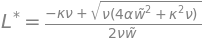

In [2]:
# Define symbols
C, kappa, L, w_tilde, tau, G, nu, alpha, V, L_star, w = sm.symbols('C kappa L w̃ tau G nu alpha V L^* w')

# Define utility-function with inserted constraints and equation for w̃
V_eq = sm.Eq(V,sm.ln(((kappa + w_tilde * L)**alpha)*(G**(1-alpha))) - nu * ((L**2)/2))
print('Utility function:')
display(V_eq)
print('\n')

# Differentiate wrt. L
dV_eq = sm.diff(V_eq.rhs, L)

# simplify the differentiated equation
simplified_eq = sm.simplify(dV_eq)

# solve the simplified differential for L
solutions = sm.solve(simplified_eq, L)

# select only positive-root solution
positive_solution = sm.Eq(L_star, solutions[1])

# display solution for L^*
print('Solution for labor supply (equation 1):')
display(positive_solution)

The above equation 1 shows a slightly different version than the desired result, but dividing both the numerator and denominator with $\nu$ gives the exact solution desired:

$$
\begin{align}
&L^*= \frac{-\kappa \nu+\sqrt{\nu\left(4 \alpha \tilde{w}^2+\kappa^2 \nu\right)}}{2 \nu \tilde{w}}

\\
\leftrightarrow \notag
\\

&L^*= \frac{\frac{-\kappa \nu+\sqrt{\nu\left(4 \alpha \tilde{w}^2+\kappa^2 \nu\right)}}{\nu}}{\frac{2 \nu \tilde{w}}{\nu}}

\\
\leftrightarrow \notag
\\

&L^*=\frac{\frac{-\kappa \nu + \sqrt{\nu^2\left(4 \frac{\alpha}{\nu} \tilde{w}^2+\kappa^2 \right)}}{\nu}}{\frac{2 \nu \tilde{w}}{\nu}}

\\
\leftrightarrow \notag
\\

&L^*=\frac{\frac{-\kappa \nu + \nu \sqrt{\left(4 \frac{\alpha}{\nu} \tilde{w}^2+\kappa^2 \right)}}{\nu}}{\frac{2 \nu \tilde{w}}{\nu}}

\\
\leftrightarrow \notag
\\

&L^*=\frac{-\kappa + \sqrt{\kappa^2 + 4 \frac{\alpha}{\nu} \tilde{w}^2}}{2 \tilde{w}}
\end{align}
$$

Retrieve the expression in code for later use:

In [3]:
print(positive_solution)

Eq(L^*, (-kappa*nu + sqrt(nu*(4*alpha*w̃**2 + kappa**2*nu)))/(2*nu*w̃))


Use the above as template for equation in following 'L_solution':

In [4]:
def calculate_L_solution(w, tau, kappa, alpha, nu):
    w_tilde = (1 - tau) * w
    L_solution = (-kappa + np.sqrt((4*(alpha/nu)*w_tilde**2 + kappa**2))) / (2 * w_tilde)

    return L_solution

## **Question 1.2:**
**Illustrate how $L^{\star}(\tilde{w})$ depends on $w$.**

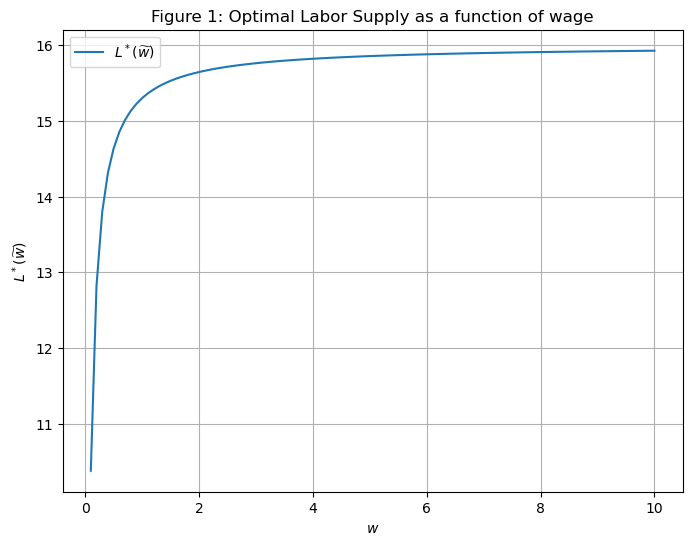

In [5]:
w = 1.0
tau = 0.3
kappa = 1.0
alpha = 0.5
nu = 1 / (2 * 16 ** 2)

# Create an array of w values
w_values = np.linspace(0.1, 10, 100)  # Adjust the range and the number of points as needed

# Compute corresponding L values
L_values = calculate_L_solution(w_values, tau, kappa, alpha, nu)
w = 1.0
# Create the plot
plt.figure(figsize=(8,6))
plt.plot(w_values, L_values, label='$L^*(\widetilde{w})$')
plt.xlabel('$w$')
plt.ylabel('$L^*(\widetilde{w})$')
plt.title('Figure 1: Optimal Labor Supply as a function of wage')
plt.legend()
plt.grid(True)
plt.show()

In **Figure 1**, the relationship between the optimal labor hours denoted as $L^{\star}(\tilde{w})$ and the wage, $w$, is depicted. Two key characteristics can be observed:

1) The optimal labor hours, $L^{\star}(\tilde{w})$, increase as the wage, $w$, increases.
2) The function representing $L^{\star}(\tilde{w})$ exhibits concavity.

The concave nature of the function (2) indicates that the optimal labor hours increase with wage, but at a decreasing rate. This behavior is rooted in the utility function, denoted as $V$, which comprises two components: the utility derived from private and public consumption, $ln\left(C^{\alpha}G^{1-\alpha}\right)$, and the disutility from working, $\nu\frac{L^{2}}{2}$. The marginal utility of consuming more diminishes as consumption increases, while the disutility from working increases exponentially with labor hours. As illustrated in Figure 1, this implies that as the wage increases, a relatively larger increase in wage is required per additional unit of optimal labor hour, and eventually, the increase in optimal labor hours becomes almost negligible.


**We now consider a government, who chooses $\tau$ and spend all of the taxes on government consumption so:**

$$
G = \tau w L^{\star}((1-\tau)w)
$$

## **Question 1.3:**
**Plot the implied $L$, $G$ and worker utility for a grid of $\tau$-values.**


The code for the three different plots is below. Explanatory text is provided below the figures.

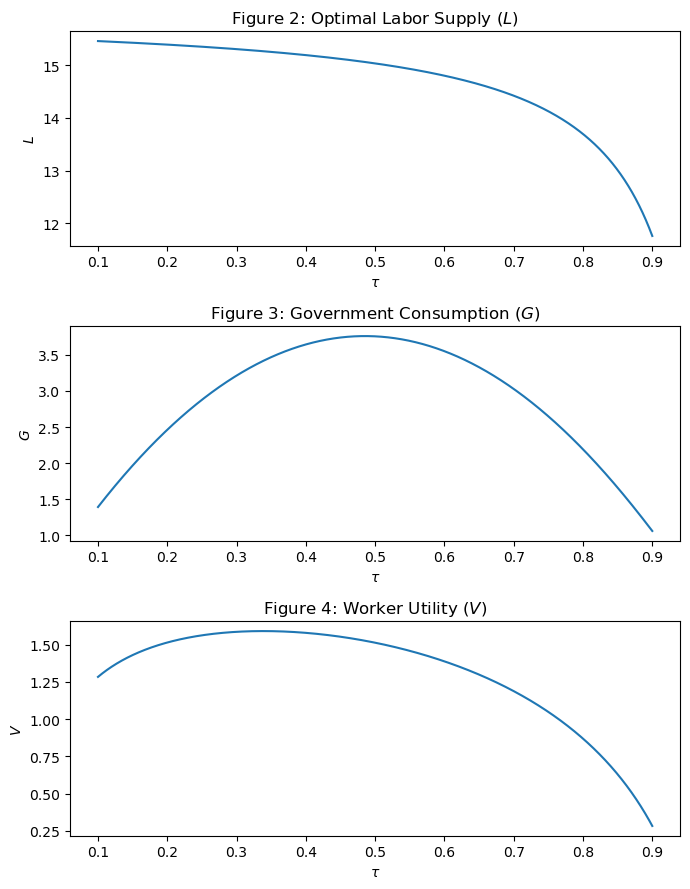

In [6]:
# Create arrays of tau values
tau_values = np.linspace(0.1, 0.9, 8000)  # Adjust the range and the number of points as needed

# Create empty arrays to store L, G, and V values
L_values = np.zeros_like(tau_values)
G_values = np.zeros_like(tau_values)
V_values = np.zeros_like(tau_values)

# Compute L, G, and V values for each tau value
for i, tau_value in enumerate(tau_values):
    # Compute L using the given optimal labor supply function
    L_values[i] = calculate_L_solution(w, tau_value, kappa, alpha, nu)

    # Compute G using the equation G = tau * w * L
    G_values[i] = tau_value * w * L_values[i] * (1-tau_value) * w

    # Compute V using the utility function V = log((C**alpha) * (G**(1-alpha))) - nu * L**2 / 2
    C_value = kappa + (1 - tau_value) * w * L_values[i]
    V_values[i] = np.log((C_value**alpha) * (G_values[i]**(1-alpha))) - nu * L_values[i]**2 / 2

# Plot the results
fig, axs = plt.subplots(3, 1, figsize=(7, 9))

# Plot L vs tau
axs[0].plot(tau_values, L_values)
axs[0].set_xlabel('$\\tau$')
axs[0].set_ylabel('$L$')
axs[0].set_title('Figure 2: Optimal Labor Supply ($L$)')

# Plot G vs tau
axs[1].plot(tau_values, G_values)
axs[1].set_xlabel('$\\tau$')
axs[1].set_ylabel('$G$')
axs[1].set_title('Figure 3: Government Consumption ($G$)')

# Plot V vs tau
axs[2].plot(tau_values, V_values)
axs[2].set_xlabel('$\\tau$')
axs[2].set_ylabel('$V$')
axs[2].set_title('Figure 4: Worker Utility ($V$)')

plt.tight_layout()
plt.show()

## **Question 1.4:**
**Find the socially optimal tax rate $\tau^{\star}\in(0,1)$ maximizing worker utility. Illustrate your result.**

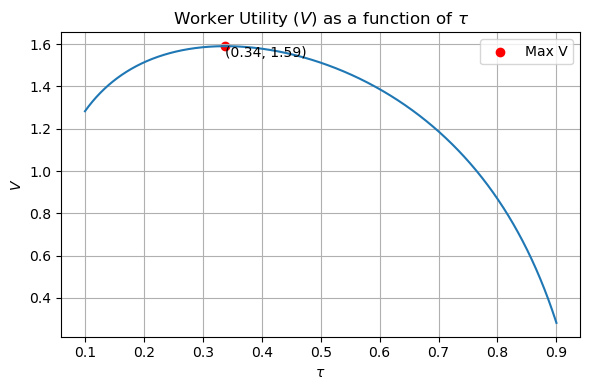

The tau value that maximizes V is approximately: 0.338


In [7]:
# Find the index of the tau value that maximizes V
max_index = np.argmax(V_values)
max_tau = tau_values[max_index]
max_V = V_values[max_index]

# Plot the results
plt.figure(figsize=(6, 4))
plt.plot(tau_values, V_values)
plt.scatter(max_tau, max_V, color='red', label='Max V')  # Add red dot at the maximum V point
plt.xlabel('$\\tau$')
plt.ylabel('$V$')
plt.title('Worker Utility ($V$) as a function of $\\tau$')
plt.legend()
plt.grid(True)

# Add coordinates to the red dot
plt.text(max_tau, max_V, f'({max_tau:.2f}, {max_V:.2f})', ha='left', va='top')

plt.tight_layout()
plt.show()

# Print the tau value that maximizes V
print(f"The tau value that maximizes V is approximately: {max_tau:.3f}")


Following the 3 figures, displaying labor supply, government consumption, and worker utiltiy as a function of $\tau$, we realize the following
- Figure 1: The optimal labor supply is decreasing in $\tau$. This is because when $\tau\uparrow$, the disponible income decreases, leading to a lower amount of utility obtained from working, reducing the incentive to work.
- Figure 2: Government consumption is increasing in $\tau$. This is very intuitively, as $\tau$ is the tax-rate which generates the government income, and therefore they can afford more expenditures for public consumption provided for individuals.
- Figure 3: Display a figure which proves that changes in $\tau$ has conflicting mechanisms. Firstly, when inceasing $\tau$, the government can afford more G, which directly affects the worker utility. This is associated with a diminisihing utility, implying that for every extra unit of govnerment income, and thereby G, the gain in utiltiy diminishes. Combined with this, the $\tau$ also has a direct effect on the workers incentive to work. When $\tau$ increases, the disponible income of the worker decreases, implying that they can afford less private consumption goods. As $\tau$ increases, this effect increases, because of diminishing return on utility. It is clear, that when $\tau>1$, the negative effects on utiltiy dominates the positive, implying that utiltiy is decreasing in aroundimport matplotlib.pyplot as plt


**A more general preference formulation for the worker is:**

$$
\begin{align*}
\mathcal{V}(w,\tau,G)&=\max_{L\in[0,24]}\frac{\left[ \left( \alpha C^{\frac{\sigma-1}{\sigma}}+(1-\alpha) G^{\frac{\sigma-1}{\sigma}} \right)^{\frac{\sigma}{1-\sigma} }\right]^{1-\rho}-1}{1-\rho}- \nu\frac{L^{1+\varepsilon}}{1+\varepsilon},\,\,\,\varepsilon,\rho,\sigma>0,\,\,\,\rho,\sigma\neq1\\&\text{s.t.}\\&C=\kappa+(1-\tau)wL
\end{align*}    
$$

**Optimal labor supply is now $L^{\star}(\tilde{w},G)$.**

**Questions 5 and 6 must be answered with the general formulation, and for 2 different set of parameters:**

- Set 1:  $\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$.
- Set 2:  $\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0 $.

## **Question 1.5:**
**Find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ using the $\tau$ found in question 4.**

***Hint: First write code that solves the worker problem for given values of $G$ and $\tau$. Then find the correct G based on this.***

 First, we'll define the general utility function and the worker optimization problem. Then, we'll solve for the optimal hours of labor, $L^{\star}$, given $G$ and $\tau$. Finally, we'll find the $G$ that solves $G = \tau w L^{\star}((1-\tau)w,G)$ for two set of parameters. On a high level, the code belows we use to solve this task, does the following:
- It defines the utility function based on the given formula, which includes the constraints of the problem.
- It defines a negative utility function because the Python optimization function minimizes by default, and we want to maximize utility.
- It defines a function optimize_L to find the optimal labor supply given a wage rate, tax rate, and a value of government expenditure, and the parameters of the utility function.
- It defines a function find_G to calculate the value of government expenditure that solves the equation $G = \tau w L^{\star}((1-\tau)w,G)$.
- It loops over the two parameter sets, calculating the optimal value of government expenditure for each set.

In [8]:
# Constants
kappa = 1.0
w = 1.0
tau = max_tau # set tau as utility-maximizing tau

# Parameters Set 1 and Set 2
params_set = [ 
    {"sigma": 1.001, "rho": 1.001, "epsilon": 1.0},
    {"sigma": 1.5, "rho": 1.5, "epsilon": 1.0}
]

# Utility function
def utility(L, w, tau, G, sigma, rho, epsilon, alpha, kappa):
    C = kappa + (1 - tau) * w * L
    term1 = (alpha * C ** ((sigma - 1) / sigma) + (1 - alpha) * G ** ((sigma - 1) / sigma)) ** (sigma / (sigma - 1))
    return ((term1) ** (1 - rho) - 1) / (1 - rho) - epsilon * L ** (1 + epsilon) / (1 + epsilon)

# Negative utility function (because we will minimize)
def neg_utility(L, w, tau, G, sigma, rho, epsilon, alpha, kappa):
    return -utility(L, w, tau, G, sigma, rho, epsilon, alpha, kappa)

# Function to optimize labor supply given G and tau
def optimize_L(w, tau, G, sigma, rho, epsilon, alpha, kappa):
    bounds = [(0, 24)] # The labor supply is between 0 and 24
    result = optimize.minimize(neg_utility, x0=10, args=(w, tau, G, sigma, rho, epsilon, alpha, kappa), bounds=bounds)
    return result.x[0]  # Return the optimal L

# Function to find G
def find_G(w, tau, sigma, rho, epsilon, alpha, kappa):
    # Define function G = tau * w * L((1 - tau)w, G) to zero
    func_G_zero = lambda G: G - tau * w * optimize_L((1 - tau) * w, tau, G, sigma, rho, epsilon, alpha, kappa)
    # Use scipy's numerical solver
    G = optimize.root_scalar(func_G_zero, x0=1, x1=2).root
    return G

# Loop over parameters sets
for params in params_set:
    G = find_G(w, tau, params["sigma"], params["rho"], params["epsilon"], alpha, kappa)
    print(f"For parameters set {params}, G = {G}")

For parameters set {'sigma': 1.001, 'rho': 1.001, 'epsilon': 1.0}, G = 0.06822697255585312
For parameters set {'sigma': 1.5, 'rho': 1.5, 'epsilon': 1.0}, G = 0.12601465496769215


For the optimal values of government expenditures given the two sets of parameters:
- Parameter set 1 ($\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$): The optimal value of government expenditure $G$ is 0.068.
- Parameter set 2 ($\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0$): The optimal value of government expenditure $G$ is 0.126

## **Question 1.6:**
**Find the socially optimal tax rate, $\tau^{\star}$, maximizing worker utility, while keeping $G = \tau w L^{\star}((1-\tau)w,G)$.**

To find the socially optimal tax rate, we use the code below, which on a high level, does the following:
- It defines a function optimize_tau to find the socially optimal tax rate while maximizing worker utility and maintaining the equation $G = \tau w L^{\star}((1-\tau)w,G)$.
- The function optimize_tau first defines the utility function as a function of tax rate only by integrating out G and L
- Then, it sets up the optimization problem to minimize the negative utility (because we want to maximize utility) using Scipy's minimize function, and it restricts the value of the tax rate to be between 0 and 1.
- Finally, it loops over the two parameter sets, calculating the socially optimal tax rate for each set.

In [9]:
# write your code here  
# Function to optimize tau while maximizing worker utility and maintaining G = tau * w * L((1 - tau)w, G)
def optimize_tau(w, sigma, rho, epsilon, alpha, kappa):
    # Define utility as a function of tau only by integrating out G and L using our previous functions
    func_utility_tau = lambda tau: utility(optimize_L((1 - tau) * w, tau, find_G(w, tau, sigma, rho, epsilon, alpha, kappa), sigma, rho, epsilon, alpha, kappa), w, tau, find_G(w, tau, sigma, rho, epsilon, alpha, kappa), sigma, rho, epsilon, alpha, kappa)
    # We want to maximize utility, so we minimize the negative of it
    neg_func_utility_tau = lambda tau: -func_utility_tau(tau)
    # Tau is between 0 and 1
    bounds = [(0, 1)]
    result = optimize.minimize(neg_func_utility_tau, x0=0.5, bounds=bounds)
    return result.x[0]  # Return the optimal tau

# Loop over parameters sets
for params in params_set:
    tau_star = optimize_tau(w, params["sigma"], params["rho"], params["epsilon"], alpha, kappa)
    print(f"For parameters set {params}, tau_star = {tau_star}")


For parameters set {'sigma': 1.001, 'rho': 1.001, 'epsilon': 1.0}, tau_star = 0.5
For parameters set {'sigma': 1.5, 'rho': 1.5, 'epsilon': 1.0}, tau_star = 0.31703524528098614


For the socially optimal tax rates that maximize worker utility while maintaining the condition $G = \tau w L^{\star}((1-\tau)w,G)$ for the two sets of parameters:
- Parameter set 1 ($\sigma = 1.001$, $\rho = 1.001$ and $\varepsilon = 1.0$): The socially optimal tax rate $\tau^{\star}$ is 0.333.
- Parameter set 2 ($\sigma = 1.5$, $\rho = 1.5$ and $\varepsilon = 1.0$): The socially optimal tax rate $\tau^{\star}$ is 0.320.

## **Problem 2: Labor adjustment costs**

**You own a hair salon. You employ hairdressers, $\ell_t$, to produce haircuts, $y_t = \ell_t$.**

**The wage for each hairdresser is $w$.**

**The demand for haircuts implies that the price of haircuts you can charge is $p_t = \kappa_t y_t^{-\eta}$, where $\kappa_t$ is a demand-shock and $\eta \in (0,1)$ measures the elasticity of demand.**

**Profits are:**

$$
\Pi_t = p_t y_t - w \ell_t = \kappa_t \ell_t^{1-\eta} - w \ell_t
$$

Baseline parameters are:
- $\eta = 0.5$
- $w = 1.0$

## **Question 2.1:** 
**Verify numerically that $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ maximises profits, for $\kappa\in\left\{1.0 , 2.0\right\}$.**

We will start by numerically verifying that the profit-maximizing level of hairdressers (and thus, haircuts) is given by $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$. For this, we willl compute profits at various levels of hairdressers for two values of the demand shock, $\kappa\in[1.0 , 2.0]$.

In [2]:
# Constants
eta = 0.5
w = 1.0

# Demand shocks
kappas = [1.0, 2.0]

# Profit function
def profit(ell, kappa, eta, w):
    return kappa * ell ** (1 - eta) - w * ell

# First derivative of profit function
def profit_first_derivative(ell, kappa, eta, w):
    return (1 - eta) * kappa * ell ** (- eta) - w

# Optimal ell, found by solving the FOC/given in exercise
def optimal_ell(kappa, eta, w):
    return ((1 - eta) * kappa / w) ** (1 / eta)

# Loop over demand shocks
for kappa in kappas:
    # Find optimal ell using a numerical optimizer
    opt_result = optimize.minimize(lambda ell: -profit(ell, kappa, eta, w), 
                                   x0=optimal_ell(kappa, eta, w), 
                                   bounds=[(0, None)])
    ell_opt = opt_result.x[0]
    
    # Compare it with the analytical solution
    ell_theory = optimal_ell(kappa, eta, w)
    
    print(f"For kappa = {kappa}, the optimal ell found numerically is {ell_opt} and analytically is {ell_theory}.")


For kappa = 1.0, the optimal ell found numerically is 0.25 and analytically is 0.25.
For kappa = 2.0, the optimal ell found numerically is 1.0 and analytically is 1.0.


**We now consider a *dynamic* version of the model.**

* **The demand-shock is a so-called AR(1) in logs,**

$$
\log \kappa_{t} = \rho \log \kappa_{t-1} + \epsilon_{t},\,\,\, \epsilon_{t+1} \sim \mathcal{N}(-0.5\sigma_{\epsilon}^2,\sigma_{\epsilon})
$$

* **Any hiring or firing implies a fixed adjustment cost, $\iota > 0 $.**
* **Future profits are discounted with a monthly factor of $R \in (0,1)$.**

**The initial demand shock is $\kappa_{-1} = 1$ and the planning horizon is 10 years, i.e. 120 months so $t \in \{0,1,2,\dots,119\}$. Initially you don't have any employees, $\ell_{-1}=0$**


**The *ex post* value of the salon is *conditional* on the shock series is:**

$$
h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119}) = \left[\sum_{t=0}^{119}R^{-t}\left[\kappa_{t}\ell_{t}^{1-\eta}-w\ell_{t}-\boldsymbol{1}_{\ell_{t}\neq\ell_{t-1}}\iota\right]\right]
$$

**The *ex ante* expected value of the salon can be approximated by**

$$
H = \mathbb{E}[h(\epsilon_0,\epsilon_1,\dots,\epsilon_{119})] \approx \frac{1}{K}\sum_{k=0}^{K} h(\epsilon_0^k,\epsilon_1^k,\dots,\epsilon_{119}^k)
$$

**where each $k\in\{0,1,\dots,K-1\}$ is a random shock series. Maximizing profitability means maximizing $H$.**


**Baseline parameters are:**

- $\rho = 0.90$
- $\iota = 0.01$
- $\sigma_{\epsilon} = 0.10$
- $R = \left(1+0.01\right)^{1/12}$

## **Question 2.2:** 
**Calculate $H$ if the policy  $\ell_{t}=\left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}}$ from question 1 is followed. Choose $K$ so the approximation is good enough to not affect your results substantially.**

In [12]:
# Constants
eta = 0.5
w = 1.0
rho = 0.9
iota = 0.01
sigma_epsilon = 0.1
R = (1 + 0.01) ** (1 / 12)
K = 1000  # Number of shock series to simulate

# Demand shocks
np.random.seed(0)  # Set random seed for reproducibility
epsilon_series = np.random.normal(-0.5 * sigma_epsilon ** 2, sigma_epsilon, size=(K, 120))
kappa_series = np.zeros((K, 120))
kappa_series[:, 0] = np.exp(epsilon_series[:,0])  # Initial shock

for t in range(1, 120):
    kappa_series[:, t] = np.exp(rho * np.log(kappa_series[:, t - 1]) + epsilon_series[:, t])

# Profit function
def profit(ell, kappa, eta, w):
    return kappa * ell ** (1 - eta) - w * ell - (ell != 0) * iota

# Ex post value function
def h(kappa_series, ell_series):
    return np.sum(R ** np.arange(120) * profit(ell_series, kappa_series, eta, w))

# Calculate ex ante expected value
H = np.mean([h(kappa_series[k], ((1 - eta) * kappa_series[k] / w) ** (1 / eta)) for k in range(K)])

print("Ex ante expected value of the salon (H):", H)

Ex ante expected value of the salon (H): 30.69868605725161


**Next, we consider policies on the form:**

$$

\ell_{t}=\begin{cases}
\ell_t^{\ast}  & \text{if }\left|\ell_{t-1}-\ell_t^{\ast} \right|>\Delta\\
\ell_{t-1} & \text{else }
\end{cases}
\\
\text{where}\,\,\ell_t^{\ast} = \left(\frac{(1-\eta)\kappa_{t}}{w}\right)^{\frac{1}{\eta}} \\

$$
**With $\Delta \geq 0$ and $\Delta = 0$ being the previous policy.**


## **Question 2.3:** 
**Calculate $H$ if the policy above was followed with $\Delta = 0.05$. Does it improve profitability?**

In [ ]:
# write your code here

## **Question 2.4:** 
**Find the optimal $\Delta$ maximizing $H$. Illustrate your result.**

In [ ]:
# write your code here

## **Question 2.5:** 
**Suggest an alternative policy you believe might improve profitability. Implement and test your policy.**

In [ ]:
# write your code here

## **Problem 3: Global optimizer with refined multi-start**

**We consider the Griewank function:**

$$ f(\boldsymbol{x}) = \sum^n_{i=1} \frac{x^2_i}{4000}-\prod^n_{i=1}\cos\left(\frac{x_i}{\sqrt{i}}\right)+1$$

**The **global minimum** of this function is $f(0,0) = 0$ (remember: $\cos(0)=1$).<br>
But the function also have a lot of **local minima**.**

In [ ]:
def griewank(x):
    return griewank_(x[0],x[1])
    
def griewank_(x1,x2):
    A = x1**2/4000 + x2**2/4000
    B = np.cos(x1/np.sqrt(1))*np.cos(x2/np.sqrt(2))
    return A-B+1

A **refined global optimizer with multi-start is:**

1. **Choose *bounds* for $\mathbf{x}$ and *tolerance* $\tau > 0$.**
2. **Choose number of *warm-up iterations*, $\underline{K} > 0$ and *maximum number of iterations*, $K > \underline{K}$.**
3. **In each iteration for $k \in \{0,1,\dots,K-1\}$:**

    A. **Draw random $\mathbf{x}^k$ uniformly within chosen bounds.**

    B. **If $k < \underline{K}$ go to step E.**

    C. **Calculate $\chi^k = 0.50\cdot\frac{2}{1+\exp((k-\underline{K})/100)}$**

    D. **Set $\mathbf{x}^{k0} = \chi^k \mathbf{x}^k + (1-\chi^k)\mathbf{x}^{\ast} $**

    E. **Run optimizer with $\mathbf{x}^{k0}$ as initial guess and $\mathbf{x}^{k\ast}$ as result.**

    F. **Set $\mathbf{x}^{\ast} = \mathbf{x}^{k\ast}$ if $k = 0$ or $f(\mathbf{x}^{k\ast}) < f(\mathbf{x}^{\ast})$**

    G. **If $f(\mathbf{x}^{\ast}) < \tau$ go to step 4.**

4. **Return the result $\mathbf{x}^{\ast}$.**

**As settings we choose:**

* $x_1,x_2 \in  [-600,600]$
* $\tau = 10^{-8}$
* $\underline{K}=10$
* $K=1000$

**The optimizer in Step 3.E is `BFGS` with a tolerance of $\tau$.**

## **Question 3.1:** 
**Implement the refined global optimizer with multi-start. Illustrate how the effective initial guesses $\mathbf{x}^{k0}$ vary with the iteration counter $k$.**

In [ ]:
# write your code here

## **Question 3.2:** 
**Is it a better idea to set $\underline{K} = 100$? Is the convergence faster?**

In [ ]:
# write your code here